# Creditworthiness (Project 4)

## Problem setting

A bank wants to predict the creditworthiness of its customers. Based on the customer records, the credit history, etc., a customer should be classified as creditworthy or unworthy of credit. 
It is five times more 'expensive' for the bank to rate a customer who is unworthy of credit as creditworthy than vice versa. In addition, not all information is available for all customers. 
For 1,000 representatively selected customers, the creditworthiness is known. For these customers the following data has been collected. (Features for which not all values are known are marked with the addition "incomplete".)

## Importing Python packages

Importing all the python packages we are going to use:

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

## Preprocessing the data

First of all we need to import the data from the given file 'kredit.dat'.

In [341]:
#read flash.dat to a list of lists
datContent = [i.strip().split() for i in open("./kredit.dat").readlines()]

#write it as a new CSV file
with open("./kredit.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

#naming the labels of the columns
columns = ['Status of existing checking account','Duration in month','Credit history','Purpose','Credit amount','Savings account/bonds','Present employment since','Installment rate in percentage of disposable income',
'Personal status and sex','Other debtors/guarantors','Present residence since','Porperty','Age in years','Other installment plans','Housing','Number of existing credits at this brank','Job','Number of people being liable to provide maintenance for',
'Telephone','Foreign worker','Creditworthy']

#creating the dataframe
df = pd.read_csv('./kredit.csv',names=columns)
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors/guarantors,...,Porperty,Age in years,Other installment plans,Housing,Number of existing credits at this brank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Creditworthy
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


We have now build our dataframe, but to handle the missing values we need to transform some of the attributes, since a lot of them are devided into classes (like A32, A33,...). To train a model that can make a prediction on our missing values we need vectors with only numerical values. Therefore we create new features for our data like that: A30=0, A31=0, A32=1, A33=0, A34=0 (for the "Credit history" of the client being A32). We need to apply that process for every non numerical feature.

In [342]:
print(df.dtypes) #display the data type of each column

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose                                                     object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since                                    object
Installment rate in percentage of disposable income          int64
Personal status and sex                                     object
Other debtors/guarantors                                    object
Present residence since                                      int64
Porperty                                                    object
Age in years                                                 int64
Other installment plans                                     object
Housing                                                     ob

As we can the features: "Status of existing checking account", "Credit history", "Purpose", "Savings account/bonds", "Present employment since", "Personal status and sex", "Other debtors/guarantors", "Porperty", "Other installment plans", "Housing", "Job", "Telephone" and "Foreign worker" are all non numerical features, which we have to transform.

In [343]:
style = OneHotEncoder()
non_numerics = df.select_dtypes(include='object')
non_numerics = non_numerics.drop(['Purpose','Present employment since','Job','Foreign worker'],axis=1) #excluding these columns since there are values missing and therefore not transformable
non_numerics = non_numerics.drop('Telephone',axis=1) #only has two classes, which means we can transform it within the column to 0 for A191 and 1 for A192
df.loc[df['Telephone'] == 'A191', 'Telephone'] = 0.0
df.loc[df['Telephone'] == 'A192', 'Telephone'] = 1.0
df['Telephone'] = df['Telephone'].astype('int64')
for i in non_numerics.columns.tolist():
    transformation = style.fit_transform(df[[i]]) #transform column i
    df = df.join(pd.DataFrame(transformation.toarray(), columns=style.categories_[0])) #add new categories (of transformation) to our dataframe
    df = df.drop(i, axis=1) #dropping old column since we transformed its information
df.head()

,Duration in month,Purpose,Credit amount,Present employment since,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this brank,Job,Number of people being liable to provide maintenance for,...,A121,A122,A123,A124,A141,A142,A143,A151,A152,A153
0,36,?,2299,?,4,4,39,1,A173,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,18,A46,1239,A73,4,4,61,1,?,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,24,A40,947,A74,4,3,38,1,?,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,15,A43,1478,A73,4,3,33,2,A173,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24,A40,1525,A74,4,3,34,1,A173,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


With the next step we are going to rearrange the columns of the dataframe that our features with the missing values are the first four columns of the dataframe. This has no other purpose than giving us a better overview of the data.

In [344]:
old_order = df.columns.tolist()
new_order = [old_order[1]] + [old_order[3]] + [old_order[8]] + [old_order[11]] + [old_order[0]] + [old_order[2]] + old_order[4:8] + old_order[9:11] + old_order[12:]
df = df[new_order]
df.head()


,Purpose,Present employment since,Job,Foreign worker,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this brank,...,A121,A122,A123,A124,A141,A142,A143,A151,A152,A153
0,?,?,A173,?,36,2299,4,4,39,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,A46,A73,?,A201,18,1239,4,4,61,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,A40,A74,?,?,24,947,4,3,38,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,A43,A73,A173,A201,15,1478,4,3,33,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,A40,A74,A173,A201,24,1525,4,3,34,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


We prepare a dataframe for each of the four features we want to predict without the other three features, so we don't make a prediction based on a prediction:

In [345]:
df_1 = df.drop(['Present employment since','Job','Foreign worker'],axis=1) #'Purpose'
df_2 = df.drop(['Purpose','Job','Foreign worker'],axis=1) #'Present employment since'
df_3 = df.drop(['Purpose','Present employment since','Foreign worker'],axis=1) #'Job'
df_4 = df.drop(['Purpose','Present employment since','Job'],axis=1) #'Foreign worker'

Next up we are going to select the data we can actually work with by removing the missing values from each dataframe.

In [346]:
#the missing values are represented by '?'
df_1 = df_1.loc[df['Purpose'] != '?']
df_1 = df_1.reset_index(drop=True)
df_2 = df_2.loc[df['Present employment since'] != '?']
df_2 = df_2.reset_index(drop=True)
df_3 = df_3.loc[df['Job'] != '?']
df_3 = df_3.reset_index(drop=True)
df_4 = df_4.loc[df['Foreign worker'] != '?']
df_4 = df_4.reset_index(drop=True)

Also we change the features datatype into a numerical one by transorming them into identity vectors...

In [347]:
transformation = style.fit_transform(df_1[['Purpose']])
df_1 = df_1.reset_index(drop=True)
df_1 = df_1.join(pd.DataFrame(transformation.toarray(), columns=style.categories_[0]))
target_features_1 = style.categories_[0].tolist()
df_1 = df_1.drop('Purpose', axis=1)

transformation = style.fit_transform(df_2[['Present employment since']])
df_2 = df_2.join(pd.DataFrame(transformation.toarray(), columns=style.categories_[0]))
target_features_2 = style.categories_[0].tolist()
df_2 = df_2.drop('Present employment since', axis=1)

transformation = style.fit_transform(df_3[['Job']])
df_3 = df_3.join(pd.DataFrame(transformation.toarray(), columns=style.categories_[0]))
target_features_3 = style.categories_[0].tolist()
df_3 = df_3.drop('Job', axis=1)

transformation = style.fit_transform(df_4[['Foreign worker']])
df_4 = df_4.join(pd.DataFrame(transformation.toarray(), columns=style.categories_[0]))
df_4 = df_4.reset_index(drop=True)
target_features_4 = style.categories_[0].tolist()
df_4 = df_4.drop('Foreign worker', axis=1)

The removing of irrelevant features results in a better performing, easier to understand and faster running model. To select fitting features for our model we are going to define a function, which takes a look at the correlation matrix of the dataset and selects the features, which exceed a given threshold with their correlation to the target features.

In [348]:
def select_features(dataframe, target_features, threshold):
    corr_matrix = dataframe.corr()
    columns = dataframe.columns.tolist()
    result = []
    for i in columns:
        if i in target_features:
            continue
        for j in target_features:
            if i not in result and corr_matrix[i][j] >= threshold:
                result.append(i)
    return result

We also define two functions: one to train our model and one to make the actual classification by choosing the highest scoring class.

In [349]:
def linear_reg_model(X_train,y_train):
    model = Ridge()
    model.fit(X_train,y_train)
    return model

def classify(model, X):
    pred = model.predict(X)
    result = []
    for i in range(0,len(pred)):
        biggest = 0
        vector = []
        for j in range(0,len(pred[i])):
            if pred[i][biggest] < pred[i][j]:
                biggest = j
            vector.append(0)
        vector[biggest] = 1
        result.append(vector)
    return np.array(result)

Next up we define a function that combines the previous defined functions and finds the best selection of features to base our model on, in order to optimize the models accuracy.

In [350]:
def find_selection(dataframe, target_features):
    thresholds = []
    accuracys = []
    selections = []
    models = []
    for i in range(0,101): #loop through thresholds 0-1 with step size of 0.01
        threshold = i*0.01
        selection = select_features(dataframe,target_features,threshold)
        
        if len(selection) == 0: #no feature has a high enough correlation
            break

        df_y = dataframe[target_features]
        df_X = dataframe.drop(target_features,axis=1)
        df_X = df_X[selection]

        #raw data
        X = df_X.values
        y = df_y.values

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0) #split into train and test data

        model = linear_reg_model(X_train,y_train) #training model
        prediction = classify(model, X_test) #making prediction

        thresholds.append(threshold)
        selections.append(selection)
        models.append(model)
        accuracys.append(accuracy_score(y_true=y_test,y_pred=prediction))
    fig, ax = plt.subplots()
    ax.plot(thresholds,accuracys)
    ax.set(xlabel='correlation threshold',ylabel='accuracy',title='Model accuracy with feature selection based on feature correlation')
    plt.show()

    #find the best selection
    best = 0
    for i in range(1,len(selections)):
        if accuracys[best] <= accuracys[i]:
            best = i
    
    return models[best],selections[best]

We apply that function on each of our features with missing values:

### 'Purpose'

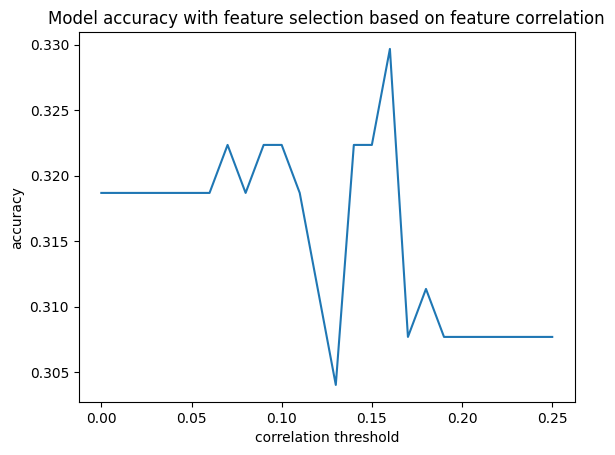

The relevant features for the target feature "Purpose" are: ['Duration in month', 'Credit amount', 'A30', 'A33', 'A94', 'A153']


In [351]:
model_1,selection_1 = find_selection(df_1,target_features_1)
print('The relevant features for the target feature "Purpose" are:', selection_1)

As we can see we had a slight improvement of the accuracy by dropping irrelevant features.

### 'Present employment since'

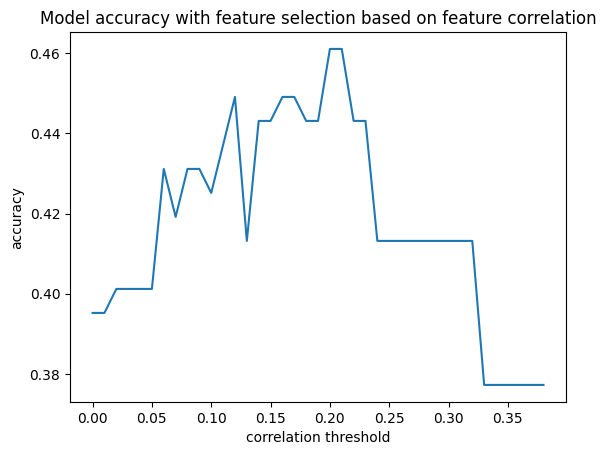

The relevant features for the target feature "Present employment since" are: ['Present residence since', 'Age in years', 'A34', 'A92', 'A93']


In [352]:
model_2,selection_2 = find_selection(df_2,target_features_2)
print('The relevant features for the target feature "Present employment since" are:', selection_2)

With this target feature we had the biggest increase in accuracy by almost +0.07. In this case the feature selection was definitly worth it and is having a huge impact on the quality of our model.

### 'Job'

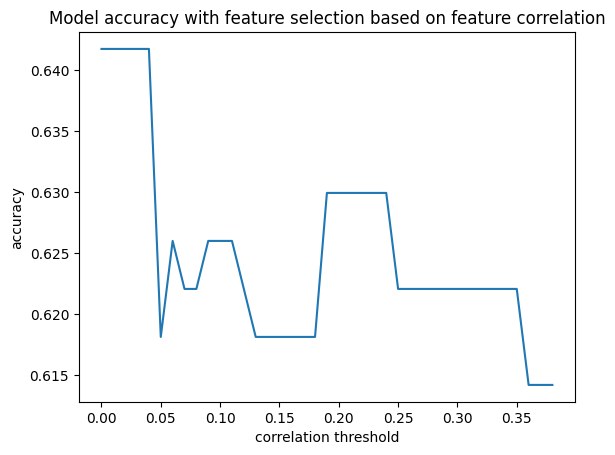

The relevant features for the target feature "Job" are: ['Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since', 'Age in years', 'Number of existing credits at this brank', 'Number of people being liable to provide maintenance for', 'Telephone', 'Creditworthy', 'A12', 'A13', 'A14', 'A31', 'A33', 'A34', 'A62', 'A63', 'A64', 'A65', 'A91', 'A92', 'A93', 'A94', 'A102', 'A103', 'A121', 'A122', 'A123', 'A124', 'A143', 'A153']


In [353]:
model_3,selection_3 = find_selection(df_3,target_features_3)
print('The relevant features for the target feature "Job" are:', selection_3)

In this case the features are too relevant for the target feature, but we were still able to cut some features to achieve a better overview while not loosing accuracy.

### 'Foreign worker'

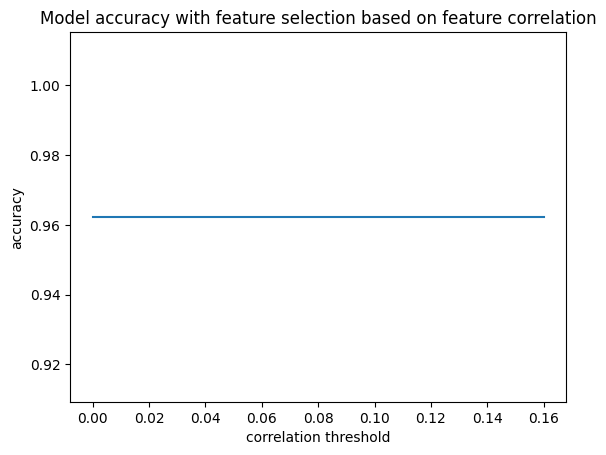

The relevant features for the target feature "Foreign worker" are: ['Duration in month', 'A121']


In [354]:
model_4,selection_4 = find_selection(df_4,target_features_4)
print('The relevant features for the target feature "Foreign worker" are:', selection_4)

This time the accuracy of the model does not change by increasing the threshold, but we were able to cut a massive amount of irrelevant features out.

Now that we have found the models we want to use, we need to apply them on the original dataframe to predict the missing values:

In [355]:

missing_1 = df.loc[df['Purpose'] == '?']
missing_1 = missing_1.drop(['Purpose','Present employment since','Job','Foreign worker'],axis=1)
missing_1 = missing_1[selection_1]
X_1 = missing_1.values
y_1 = classify(model_1,X_1)

#there is probably a better way to do this
result_1 = []
for i in y_1:
    if i[0] == 1:
        result_1.append('A40')
    elif i[1] == 1:
        result_1.append('A41')
    elif i[2] == 1:
        result_1.append('A410') 
    elif i[3] == 1:
        result_1.append('A42') 
    elif i[4] == 1:
        result_1.append('A43')
    elif i[5] == 1:
        result_1.append('A44')
    elif i[6] == 1:
        result_1.append('A45')
    elif i[7] == 1:
        result_1.append('A46')
    elif i[8] == 1:
        result_1.append('A48')
    else:
        result_1.append('A49')

missing_1['Purpose'] = result_1
missing_1 = missing_1.drop(selection_1,axis=1)
df.loc[df['Purpose'] == '?','Purpose'] = missing_1['Purpose']

missing_2 = df.loc[df['Present employment since'] == '?']
missing_2 = missing_2.drop(['Purpose','Present employment since','Job','Foreign worker'],axis=1)
missing_2 = missing_2[selection_2]
X_2 = missing_2.values
y_2 = classify(model_2,X_2)

#there is probably a better way to do this
result_2 = []
for i in y_2:
    if i[0] == 1:
        result_2.append('A71')
    elif i[1] == 1:
        result_2.append('A72')
    elif i[2] == 1:
        result_2.append('A73') 
    elif i[3] == 1:
        result_2.append('A74') 
    else:
        result_2.append('A75')

missing_2['Present employment since'] = result_2
missing_2 = missing_2.drop(selection_2,axis=1)
df.loc[df['Present employment since'] == '?','Present employment since'] = missing_2['Present employment since']

missing_3 = df.loc[df['Job'] == '?']
missing_3 = missing_3.drop(['Purpose','Present employment since','Job','Foreign worker'],axis=1)
missing_3 = missing_3[selection_3]
X_3 = missing_3.values
y_3 = classify(model_3,X_3)

#there is probably a better way to do this
result_3 = []
for i in y_3:
    if i[0] == 1:
        result_3.append('A171')
    elif i[1] == 1:
        result_3.append('A172')
    elif i[2] == 1:
        result_3.append('A173') 
    elif i[3] == 1:
        result_3.append('A174') 
    else:
        result_3.append('A175')

missing_3['Job'] = result_3
missing_3 = missing_3.drop(selection_3,axis=1)
df.loc[df['Job'] == '?','Job'] = missing_3['Job']

missing_4 = df.loc[df['Foreign worker'] == '?']
missing_4 = missing_4.drop(['Purpose','Present employment since','Job','Foreign worker'],axis=1)
missing_4 = missing_4[selection_4]
X_4 = missing_4.values
y_4 = classify(model_4,X_4)

#there is probably a better way to do this
result_4 = []
for i in y_4:
    if i[0] == 1:
        result_4.append('A201')
    else:
        result_4.append('A202')

missing_4['Foreign worker'] = result_4
missing_4 = missing_4.drop(selection_4,axis=1)
df.loc[df['Foreign worker'] == '?','Foreign worker'] = missing_4['Foreign worker']

df.head()

,Purpose,Present employment since,Job,Foreign worker,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this brank,...,A121,A122,A123,A124,A141,A142,A143,A151,A152,A153
0,A43,A75,A173,A201,36,2299,4,4,39,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,A46,A73,A173,A201,18,1239,4,4,61,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,A40,A74,A173,A201,24,947,4,3,38,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,A43,A73,A173,A201,15,1478,4,3,33,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,A40,A74,A173,A201,24,1525,4,3,34,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


After replacing the missing values with their expected classes, we are going to transform these values aswell to numericals...

In [356]:
transformation = style.fit_transform(df[['Purpose']])
df = df.join(pd.DataFrame(transformation.toarray(), columns=style.categories_[0]))
df = df.drop('Purpose', axis=1)

transformation = style.fit_transform(df[['Present employment since']])
df = df.join(pd.DataFrame(transformation.toarray(), columns=style.categories_[0]))
df = df.drop('Present employment since', axis=1)

transformation = style.fit_transform(df[['Job']])
df = df.join(pd.DataFrame(transformation.toarray(), columns=style.categories_[0]))
df = df.drop('Job', axis=1)

transformation = style.fit_transform(df[['Foreign worker']])
df = df.join(pd.DataFrame(transformation.toarray(), columns=style.categories_[0]))
df = df.drop('Foreign worker', axis=1)

df.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this brank,Number of people being liable to provide maintenance for,Telephone,Creditworthy,A11,...,A72,A73,A74,A75,A171,A172,A173,A174,A201,A202
0,36,2299,4,4,39,1,1,0,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,18,1239,4,4,61,1,1,0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,24,947,4,3,38,1,2,0,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,15,1478,4,3,33,2,1,0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24,1525,4,3,34,1,2,1,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


We are almost done with preprocessing the data. The last thing we are going to do is to drop the feature "A202". It is basically a duplicate of "A201", because the original feature "Foreign worker" has only two classes, which means that if "A201" = 1, "A202" = 0 follows and vice versa. Having duplicated data in a dataframe will create a bias of the model towards that feature, which we don't want. We also transform the creditworthy feature from 2 for creditworthy and 1 for not creditworthy to 1 for creditworthy and 0 for not creditworthy, because everything else would be confusing.

In [357]:
df = df.drop('A202',axis=1)
df.loc[df['Creditworthy'] == 1,'Creditworthy'] = 0
df.loc[df['Creditworthy'] == 2,'Creditworthy'] = 1
print(df.shape)
df.head()

(1000, 60)


,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this brank,Number of people being liable to provide maintenance for,Telephone,Creditworthy,A11,...,A71,A72,A73,A74,A75,A171,A172,A173,A174,A201
0,36,2299,4,4,39,1,1,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,18,1239,4,4,61,1,1,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,24,947,4,3,38,1,2,0,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,15,1478,4,3,33,2,1,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,24,1525,4,3,34,1,2,1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Finding a model

To select our final model we want to prioritize a high precision of the model, since as mentioned in the assignment it is five times more expensive to classify a client as creditworthy when he is not than vice versa.

In [358]:
def classifier(y_pred,threshold):
    result = []
    for i in range(0,len(y_pred)):
        if y_pred[i] < threshold:
            result.append(0)
            continue
        result.append(1)
    return np.array(result)

For that classifier we are trying to find the optimal threshold to classify someone as creditworthy.

In [359]:
def find_threshold(X_train, X_test, y_train, y_test):
    model = Ridge()
    model.fit(X_train, y_train)
    pred = model.predict(X_train) #making prediction
    best = 0
    for i in range(0,101):
        threshold = i*0.01
        
        credit = classifier(pred,threshold) #classify
        if precision_score(y_train,classifier(pred,best)) == precision_score(y_train,credit):
            if accuracy_score(y_train,classifier(pred,best)) <= accuracy_score(y_train,credit):
                best = threshold
        if precision_score(y_train,classifier(pred,best)) < precision_score(y_train,credit):
            best = threshold

    return model, best

In [360]:
df_y = df['Creditworthy']
df_X = df.drop('Creditworthy',axis=1)

X = df_X.values
y = df_y.values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=13)

model,threshold = find_threshold(X_train, X_test, y_train, y_test)
print("The precision of the model:",precision_score(y_test,classifier(model.predict(X_test),threshold)))
print("The accuracy of the model:",accuracy_score(y_test,classifier(model.predict(X_test),threshold)))

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("The precision of the RandomForestClassifier:",precision_score(y_test,pred))
print("The accuracy of the RandomForestClassifier:",accuracy_score(y_test,pred))


The precision of the model: 1.0
The accuracy of the model: 0.7181818181818181
The precision of the RandomForestClassifier: 0.5735294117647058
The accuracy of the RandomForestClassifier: 0.7272727272727273
